Nama: Arif Muhammad Laduni

NIM:1103213003

UTS : Credit Score Classification

Dataset : Credit Score Classification,

Model : Random Forest

In [107]:
# Digunakan untuk operasi array dan manipulasi numerik.
import numpy as np
# Digunakan untuk manipulasi data dan analisis data.
import pandas as pd
# Library untuk membuat visualisasi data interaktif.
import plotly.express as px
# Library lain untuk membuat visualisasi data interaktif.
import plotly.graph_objects as go
# Library untuk membuat visualisasi data statis.
import matplotlib.pyplot as plt
# Library untuk membuat visualisasi data statistik yang lebih menarik.
import seaborn as sns
# Untuk mengkodekan variabel kategorikal menjadi numerik.
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
# Untuk pemilihan fitur berdasarkan informasi mutal.
from sklearn.feature_selection import mutual_info_classif
# Untuk membagi data menjadi data latih dan data uji.
from sklearn.model_selection import train_test_split
# Model pohon keputusan ensambel.
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# Untuk evaluasi model.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
# Untuk menangani ketidakseimbangan kelas dalam data klasifikasi.
import warnings
# Mengabaikan peringatan FutureWarning.
warnings.filterwarnings("ignore", category=FutureWarning)

In [108]:
train = pd.read_csv("train.csv")
train.head()

<ipython-input-108-159958fffe23>:1: DtypeWarning:

Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.



,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [109]:
test = pd.read_csv("test.csv")
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [110]:
# Combining test and train in a single dataframe
data=pd.concat([train,test],ignore_index=True,sort=False)

In [111]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [113]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,147000.000000,150000.000000,150000.000000
mean,4190.115139,17.006940,22.623447,71.234907,21.063400,28.529014,32.283309,1432.513579
std,3180.489657,117.069476,129.143006,461.537193,14.860154,194.456058,5.113315,8403.759977
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,3.000000,28.054731,30.947775
50%,3091.000000,6.000000,5.000000,13.000000,18.000000,6.000000,32.297058,71.280006
75%,5948.454596,7.000000,7.000000,20.000000,28.000000,9.000000,36.487954,166.279555
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2597.000000,50.000000,82398.000000


In [114]:
data.isnull().sum().sort_values()

ID                              0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Changed_Credit_Limit            0
Delay_from_due_date             0
Total_EMI_per_month             0
Interest_Rate                   0
Num_Credit_Card                 0
Num_of_Loan                     0
Payment_Behaviour               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Customer_ID                     0
Num_Bank_Accounts               0
Monthly_Balance              1762
Num_Credit_Inquiries         3000
Amount_invested_monthly      6750
Num_of_Delayed_Payment      10500
Credit_History_Age          13500
Name                        15000
Type_of_Loan                17112
Monthly_Inhand_Salary       22500
Credit_Score                50000
dtype: int64

## **PraProcessing Data**

In [115]:
data = data.drop(columns= ["ID", "Customer_ID", "Month", "Name", "SSN"])

In [116]:
data = data.apply(lambda x: x.str.replace('_', '') if x.dtype == 'object' else x)

In [117]:
data.replace('', pd.NA, inplace=True)

In [118]:
data.fillna(data.mode().iloc[0], inplace=True)

In [119]:
columns=data[["Monthly_Inhand_Salary","Num_Bank_Accounts","Num_Credit_Card","Interest_Rate","Delay_from_due_date","Num_Credit_Inquiries","Credit_Utilization_Ratio","Total_EMI_per_month"]]

In [120]:
data.duplicated().value_counts()

False    150000
Name: count, dtype: int64

In [121]:
data[["Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt"]] = data[["Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt"]].astype(float)

In [122]:
data[["Age","Amount_invested_monthly", "Monthly_Balance"]] = data[["Age","Amount_invested_monthly", "Monthly_Balance"]].astype(float)

In [123]:
data.dtypes

Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [124]:
# Mendeskripsikan didalam dataframe train
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [125]:
# Memilih kolom tertentu
selected_columns_data = data[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

# Menentukan persentil untuk setiap kolom yang dipilih
percentile_threshold = 0.98
percentiles = selected_columns_data.quantile(percentile_threshold)

# Perulangan pada baris kolom untuk menghapus nilai untuk setiap kolom yang masih diatas persentil yang ditentukan sebelumnya
for column in selected_columns_data.columns:
    data = data[data[column] <= percentiles[column]]

In [126]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

data_set_numeric = data.drop(columns=non_numeric_columns)

Q1 = data_set_numeric.quantile(0.25)
Q3 = data_set_numeric.quantile(0.75)
IQR = Q3 - Q1

Outliers = ((data_set_numeric < (Q1 - 1.5 * IQR)) | (data_set_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
Outliers

Refined_Data_Set = data[~Outliers]

Refined_Data_Set

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Standard,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,23.0,Scientist,19114.12,2295.058333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,17 Years and 11 Months,No,49.574949,118.280222,LowspentLargevaluepayments,284.629162,Good
3,23.0,Scientist,19114.12,2295.058333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
5,23.0,Scientist,19114.12,2295.058333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149993,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.70,37.528511,6 Years and 5 Months,Yes,60.964772,71.794421,LowspentSmallvaluepayments,350.231473,Standard
149994,29.0,Lawyer,20002.88,1929.906667,10,8,29,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.70,27.027812,6 Years and 6 Months,Yes,60.964772,50.846847,HighspentSmallvaluepayments,341.179047,Standard
149996,25.0,Mechanic,39628.99,2295.058333,4,6,7,2.0,"Auto Loan, and Student Loan",20,...,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.442999,LowspentSmallvaluepayments,409.394562,Standard
149998,25.0,Mechanic,39628.99,2295.058333,4,6,7,2.0,"Auto Loan, and Student Loan",21,...,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.598580,HighspentSmallvaluepayments,463.238981,Standard


In [142]:
bins = [10, 20, 30, 40, 50, 60]
labels = ['10-19','20-29', '30-39', '40-49', '50-59']
Refined_Data_Set['Age_Group'] = pd.cut(Refined_Data_Set['Age'], bins=bins, labels=labels)
print(Refined_Data_Set)

         Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0       23.0  Scientist       19114.12            1824.843333   
1       23.0  Scientist       19114.12            2295.058333   
3       23.0  Scientist       19114.12            2295.058333   
4       23.0  Scientist       19114.12            1824.843333   
5       23.0  Scientist       19114.12            2295.058333   
...      ...        ...            ...                    ...   
149993  29.0  Architect       20002.88            1929.906667   
149994  29.0     Lawyer       20002.88            1929.906667   
149996  25.0   Mechanic       39628.99            2295.058333   
149998  25.0   Mechanic       39628.99            2295.058333   
149999  25.0   Mechanic       39628.99            3359.415833   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                       3                4              3          4.0   
1                       3                4              3          4.0 

In [128]:
# Mendeskripsikan didalam dataframe train
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [129]:
# Untuk menghilangkan nilai '!@9#%8' pada kolom Payment_Behaviour
data = data[data['Payment_Behaviour'] != '!@9#%8']


# Untuk menghilangkan nilai '_______' pada kolom Occupation
data = data[data['Occupation'] != '_______']

# Mencetak nilai unik dari kolom Occupation setelah penghapusan dilakukan
print(data['Occupation'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']

['Scientist' 'Lawyer' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'MediaManager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


['ScientistTeacherEngineerEntrepreneurDeveloperLawyerMedia_ManagerDoctorJournalistManagerAccountantMusicianMechanicWriterArchitect']

In [130]:
# Untuk menghasilkan dataframe baru pada Credit_Mix yang tidak ada nilai '_'
data = data[data['Credit_Mix'] != '_']

# Mencetak nilai unik pada kolom Credit_Mix
print(data['Credit_Mix'].unique())

['Standard' 'Good' 'Bad']


In [131]:
# Seleksi kolom untuk filtering
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

# Perulangan untuk selain kurang dari 0 dihapus dari dataframe
for column in selected_columns:
    data = data[data[column] >= 0]

In [132]:
# Memeriksa total jumlah data yang kosong dalam dataframe
total_missing_values = data.isnull().sum().sum()

# Melakukan pengujian kondisional
if total_missing_values == 0:
    print("Tidak ada data yang kosong")
else:
    print("Jumlah data yang kosong :", total_missing_values)

Tidak ada data yang kosong



## **Feature** **Engineering**

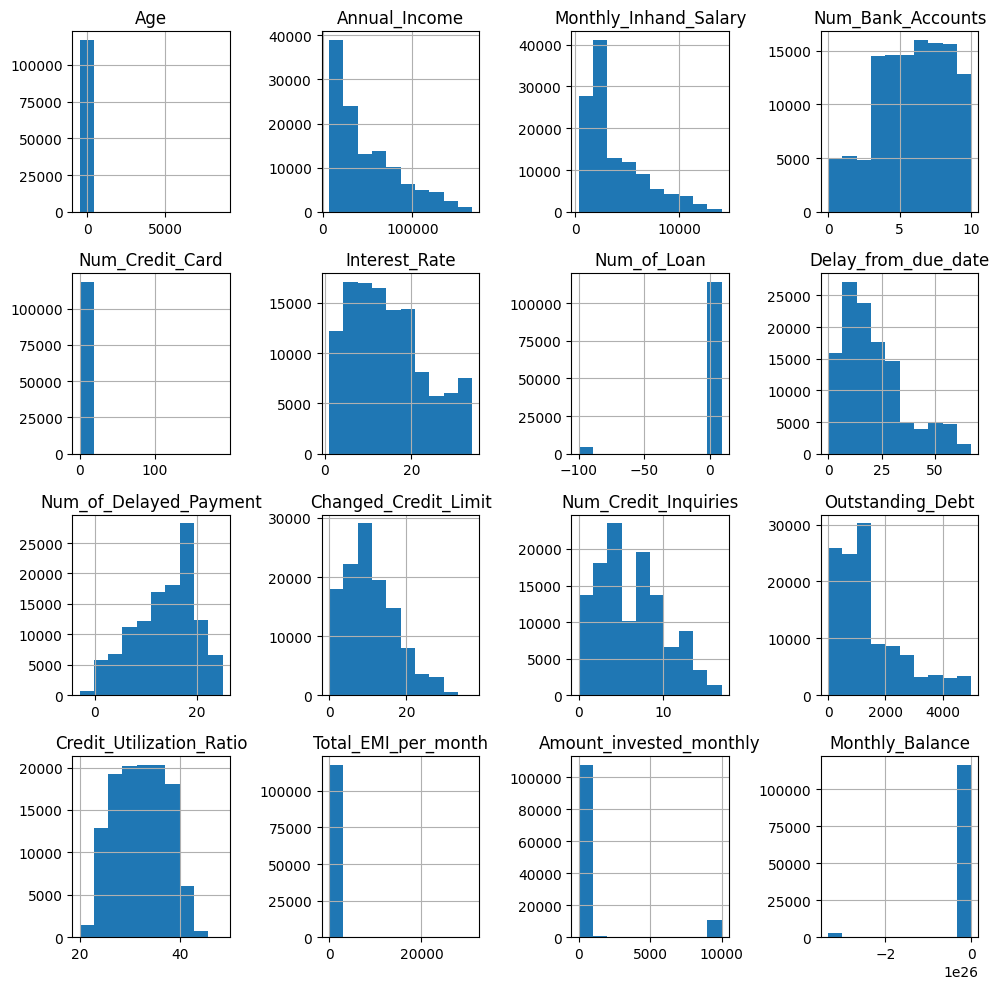

In [133]:
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

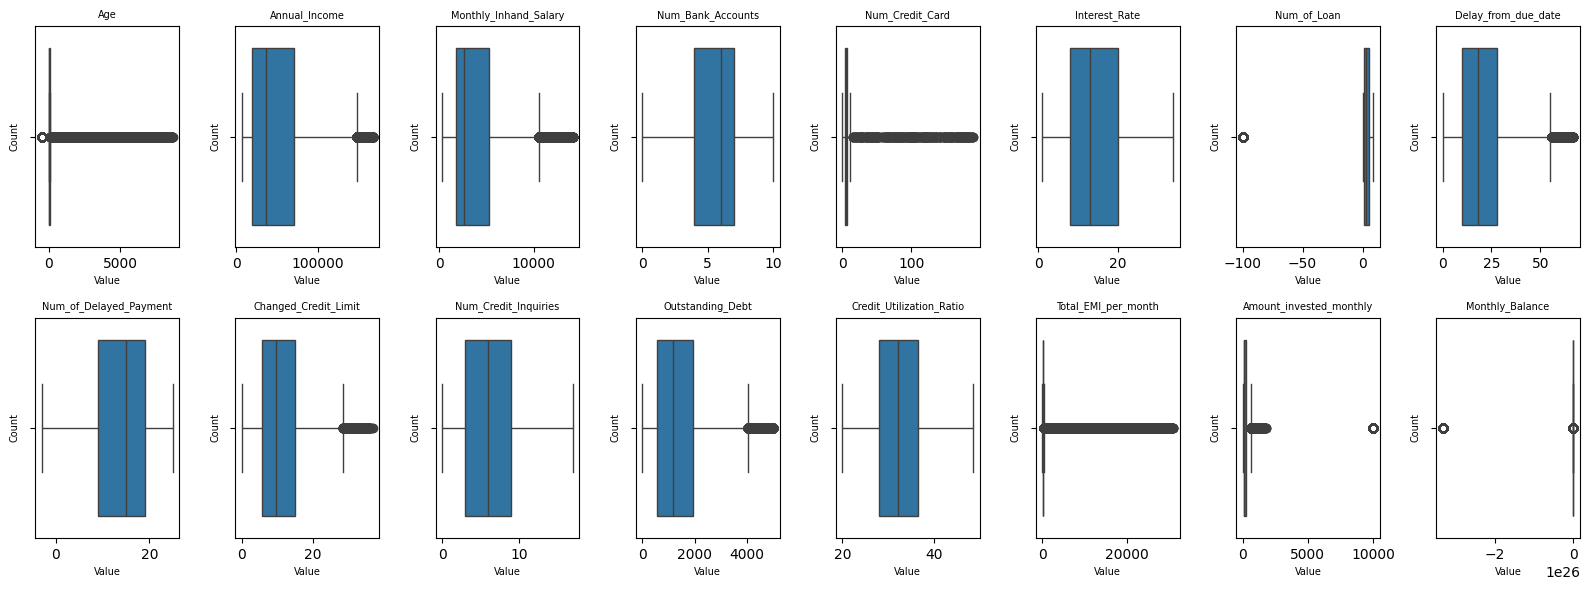

In [134]:
# Mengidentifikasi jenis-jenis tipe data dan dimasukkan kedalam numerik kolom
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Jumlah kolom yang ingin ditampilkan
num_columns = 8

# Jumlah baris yang ditampilkan sesuai dengan jumlah kolom yang ditentukan diatas
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

# Ukuran subplot
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

# Loop untuk membuat boxplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

# Loop untuk menyembunyikan subplot yang tidak digunakan
for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

# Menata ulang tata letak plot agar sesuai
plt.tight_layout()

# Menampilkan Plot
plt.show()

In [135]:
# Tune scale pada tiap kolom
train = train[train['Num_Credit_Card'] <= 10]
train = train[train['Interest_Rate'] <= 50]
train = train[train['Num_Bank_Accounts'] <= 10]
train = train[train['Delay_from_due_date'] <= 60]
train = train[train['Num_Credit_Inquiries'] <= 12]
train = train[train['Total_EMI_per_month'] <= 200]


In [136]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['Type_of_Loan'] = label_encoder.fit_transform(data['Type_of_Loan'])
data['Credit_Mix'] = label_encoder.fit_transform(data['Credit_Mix'])
data['Credit_History_Age'] = label_encoder.fit_transform(data['Credit_History_Age'])
data['Payment_of_Min_Amount'] = label_encoder.fit_transform(data['Payment_of_Min_Amount'])
data['Payment_Behaviour'] = label_encoder.fit_transform(data['Payment_Behaviour'])

In [157]:
#Label Encoder
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

data['Credit_Score_Encoded'] = encoder.fit_transform(data[['Credit_Score']])


In [154]:
# Mengidentifikasi kolom-kolom kategorikal dalam DataFrame 'train'
categorical_columns = data.select_dtypes(include=['object']).columns

# Membuat salinan data 'train' untuk proses encoding
data_encoded = data.copy()

# Membuat encoder Ordinal
encoder = OrdinalEncoder()

# Melakukan encoding pada kolom-kolom kategorikal menggunakan encoder Ordinal
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

# Memisahkan target (y) dan fitur-fitur (X) dari data yang telah diencode
y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

# Menghitung skor informasi mutual antara setiap fitur dalam X dan target y
mi_scores = mutual_info_classif(X, y)

# Mencetak skor informasi mutual untuk setiap fitur
for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.018242169188815494
Feature 'Occupation': Mutual Information Score = 0.0014379793980783262
Feature 'Annual_Income': Mutual Information Score = 0.32723490929414245
Feature 'Monthly_Inhand_Salary': Mutual Information Score = 0.2624571217533802
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.06530609117446096
Feature 'Num_Credit_Card': Mutual Information Score = 0.07194128605159622
Feature 'Interest_Rate': Mutual Information Score = 0.10776248906707786
Feature 'Num_of_Loan': Mutual Information Score = 0.056226732380336264
Feature 'Type_of_Loan': Mutual Information Score = 0.18143854513039082
Feature 'Delay_from_due_date': Mutual Information Score = 0.07553431780922959
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.05151179999593336
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.057936223686140265
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.07159517487787959
Feature 'Credit_Mix': Mutual Info

In [139]:
# Mengurutkan skor informasi mutual dan nama fitur secara terbalik
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)

# Mendapatkan nama fitur yang sudah diurutkan
sorted_columns = [x[0] for x in sorted_mi_scores]

# Mendapatkan skor informasi mutual yang sudah diurutkan
sorted_scores = [x[1] for x in sorted_mi_scores]

# Skala warna yang digunakan untuk plot
colorscale = 'Viridis'

# Membuat plot batang dengan menggunakan skor informasi mutual dan nama fitur
fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Skor Informasi Mutual', len=0.5, y=0.2)))])

# Menyesuaikan tata letak plot dan memberi judul pada sumbu-sumbunya
fig.update_layout(title='Skor Informasi Mutual untuk Setiap Fitur',
                  xaxis_title='Fitur',
                  yaxis_title='Skor Informasi Mutual')

# Menampilkan plot
fig.show()

## **Machine Learning Model**

In [159]:
y = data['Credit_Score_Encoded']

X = data [['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month']]

In [161]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
rf_params = {
    'max_depth': None,
    'min_samples_split': 2,
    'n_estimators': 200
}

model_rf = RandomForestClassifier(**rf_params)

model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.744622752478575


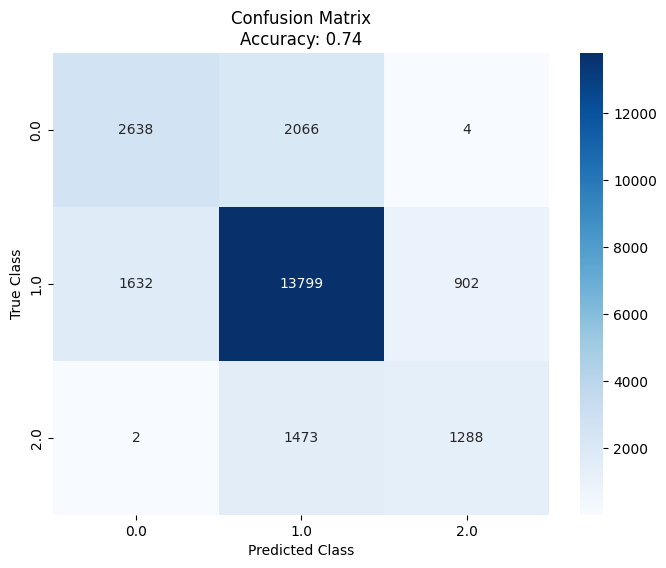

In [163]:
from sklearn.metrics import confusion_matrix

y_pred = model_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title(f"Confusion Matrix\nAccuracy: {accuracy:.2f}")
plt.show()